<a href="https://colab.research.google.com/github/linhnguyen222/DPS-Silo/blob/master/Tuan's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import re
from nltk.tokenize import WhitespaceTokenizer
from tqdm.auto import tqdm

In [ ]:
import glob
train_files = glob.glob('data_propoganda/data/protechn_corpus_eval/train/*')
train_label_files = [f for f in train_files if 'labels'  in f]
train_text_files = [f for f in train_files if 'labels' not in f]

test_files = glob.glob('data_propoganda/data/protechn_corpus_eval/test/*')
test_label_files = [f for f in test_files if 'labels'  in f][:-1]# random out-of-place file at the end.
test_text_files = [f for f in test_files if 'labels' not in f]

dev_files = glob.glob('data_propoganda/data/protechn_corpus_eval/dev/*')
dev_label_files = [f for f in dev_files if 'labels'  in f]
dev_text_files = [f for f in dev_files if 'labels' not in f]

In [ ]:
def load_df(label_files,text_files):
    df = pd.DataFrame(columns = ['ID','Prop','begin','end'])
    for i in range(len(label_files)):
        df1 = pd.read_csv(label_files[i],sep='\t',names = ['ID','Prop','begin','end'])
        with open(text_files[i],encoding='utf8') as f:
            text = f.read()
        text2 = []
        for x,y in zip(df1.begin,df1.end):
            text2.append(text[x:y])
        df1['text'] = text2
        df = df.append(df1,ignore_index=True)
    return df
dev_df = load_df(dev_label_files,dev_text_files)

test_df = load_df(test_label_files,test_text_files)
train_df = load_df(train_label_files,train_text_files)
train_df

,ID,Prop,begin,end,text
0,111111112,Slogans,191,221,Stop Islamization of America.\n
1,111111112,Black-and-White_Fallacy,476,556,We condemn all those whose behaviours and view...
2,111111112,Slogans,785,798,"Defeat Jihad"""
3,111111112,Loaded_Language,958,1015,the nation that gave the world the Magna Carta...
4,111111112,Flag-Waving,1456,1536,The UK should never become a stage for inflamm...
...,...,...,...,...,...
5109,999001621,Loaded_Language,5057,5061,sham
5110,999001621,"Name_Calling,Labeling",7492,7518,evidently completely false
5111,999001621,"Name_Calling,Labeling",8524,8545,Russian collaborators
5112,999001621,Reductio_ad_hitlerum,10098,10204,We have previously shown that the Guardian eve...


In [ ]:
counts = train_df.Prop.value_counts()
counts

Loaded_Language                                1811
Name_Calling,Labeling                           931
Repetition                                      456
Doubt                                           423
Exaggeration,Minimisation                       398
Flag-Waving                                     206
Appeal_to_fear-prejudice                        187
Causal_Oversimplification                       170
Slogans                                         120
Black-and-White_Fallacy                          97
Appeal_to_Authority                              91
Thought-terminating_Cliches                      70
Whataboutism                                     55
Reductio_ad_hitlerum                             44
Red_Herring                                      24
Straw_Men                                        11
Obfuscation,Intentional_Vagueness,Confusion      10
Bandwagon                                        10
Name: Prop, dtype: int64

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12,6]

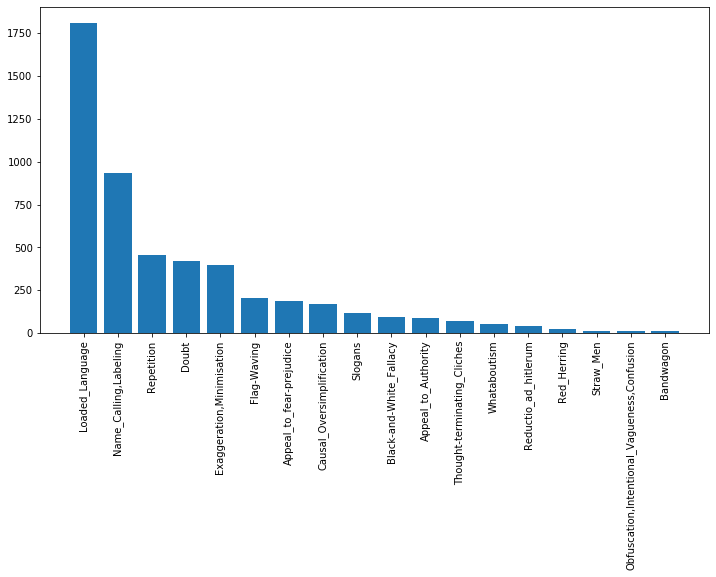

In [ ]:
plt.bar(counts.index,counts.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
display(train_df.describe())
display(train_df.info())

,ID,Prop,begin,end,text
count,5114,5114,5114,5114,5114
unique,281,18,3908,3852,4465
top,783702663,Loaded_Language,0,3534,Satan
freq,231,1811,23,5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5114 non-null   object
 1   Prop    5114 non-null   object
 2   begin   5114 non-null   object
 3   end     5114 non-null   object
 4   text    5114 non-null   object
dtypes: object(5)
memory usage: 199.9+ KB


None

In [ ]:
stop_words = stopwords.words('english')

def draw_wordcloud(prop):
    prop_text = train_df[train_df.Prop == prop]
    full_text =" ".join([i for i in prop_text.text.values])
    for char in "-.,\n''":
        full_text=full_text.replace(char,' ')
    full_text=full_text.lower()
    wordcloud = WordCloud(stopwords=stop_words,max_font_size=50, max_words=100, background_color="black").generate(full_text)
    plt.figure(figsize=[12,12])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
def display_10common(prop):
    prop_text = train_df[train_df.Prop == prop]
    full_text =" ".join([i for i in prop_text.text.values])
    for char in "-.,\n''":
        full_text=full_text.replace(char,' ')
    full_text=full_text.lower()
    word_list = full_text.split()
    word_list = [w for w in word_list if w not in stop_words]
    print(Counter(word_list).most_common(10))

In [ ]:
display_10common('Repetition')

[('autonomy', 23), ('muslim', 14), ('trump', 13), ('influential', 10), ('satan', 9), ('know', 9), ('never', 8), ('church', 8), ('fruitful', 8), ('administration', 8)]


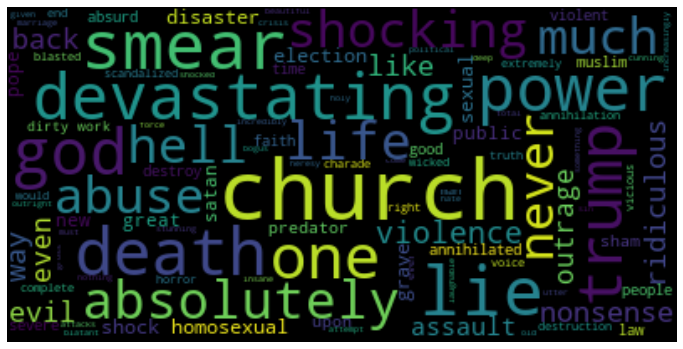

In [ ]:
draw_wordcloud('Loaded_Language')

In [ ]:
def preprocess_text(txt):
    text = re.sub("@(\w+)", " ", txt)
    text = re.sub("#(\w+)", " ", text)
    #only take letters
    text = re.sub(r'[^a-zA-Z?!.,\n ]','',text)
    
    return text

In [ ]:
train_df['length'] = train_df.text.str.split()
train_df['length'] = train_df.length.apply(lambda i: len(i))
print('Average length of a propaganda senetence: ',np.average(train_df.length.values))

Average length of a propaganda senetence:  8.031482205709816


In [ ]:
len(dev_text_files)

57

In [ ]:
def prepare_full_sent(text_files):
    size = len(text_files)
    if size > 250:
        set_ = 'train'
    elif size <250 and size > 90:
        set_ = 'test' 
    else: 
        set_ = 'dev'
    id_sent = {}
    id_idx ={}
    for text_file in tqdm(text_files):

            id = text_file.replace('article','').replace('.txt','').replace('data_propoganda/data/protechn_corpus_eval/{}\\'.format(set_),'')
            with open(text_file,encoding='utf8') as f:
                txt = f.read()
            #txt = preprocess_text(txt)
            sents = nltk.tokenize.sent_tokenize(txt)
            id_sent[id] = sents
            idxs =[]

            for sent in sents:
                length = len(sent)
                a = txt.find(sent)
                idxs.append((a,a+length))

            id_idx[id] = idxs
    return id_sent,id_idx






In [ ]:
def find_matching_sentence(doc,begin,end,id_sent,id_idx):
    spans = id_idx[str(doc)]
    for offset,end_1 in spans:
        if offset<=begin and end_1>=end:
            idx = spans.index((offset,end_1))
            return id_sent[str(doc)][idx]
        else:
            continue


In [ ]:
def create_final_df(df,set_ = 'train'):
    if set_ =='train':
        dict_sent,dict_idx = prepare_full_sent(train_text_files)
    elif set_ == 'test':
        dict_sent,dict_idx = prepare_full_sent(test_text_files)
    else:
        dict_sent,dict_idx = prepare_full_sent(dev_text_files)
    df['xtra_strings'] = df.text.str.count('(\n)')
    df['new_end'] = df.end-df.xtra_strings*2
    df['full_sent'] = [find_matching_sentence(doc,begin,end,dict_sent,dict_idx) for doc,begin,end in df[['ID','begin','new_end']].values]
    df.loc[[val is None for val in df.full_sent ],'full_sent'] = df[[val is None for val in df.full_sent ]].text
    #completed df
    full_df = df.copy()
    full_df = full_df[['ID','Prop','begin','new_end','text','full_sent']]
    return full_df

In [ ]:
train_full_df = create_final_df(train_df)

In [ ]:
test_full_df = create_final_df(test_df,'test')

In [ ]:
train_full_df.full_sent.values

array(['Pamela Geller and Robert Spencer co-founded anti-Muslim group Stop Islamization of America.',
       'He added: "We condemn all those whose behaviours and views run counter to our shared values and will not stand for extremism in any form."',
       '\'Right decision\'\nMs Geller, of the Atlas Shrugs blog, and Mr Spencer, of Jihad Watch, are also co-founders of the American Freedom Defense Initiative, best known for a pro-Israel "Defeat Jihad" poster campaign on the New York subway.',
       ..., 'It smeared Assange and Snowden as Russian collaborators.',
       'We have previously shown that the Guardian even uses fascist propaganda tropes to smear the Russian people.',
       "Unfortunately other 'western' media are not much better."],
      dtype=object)

In [ ]:
txt = open('data_propoganda/data/protechn_corpus_eval/train/article111111112.txt',encoding='utf8').read()
re.findall('\n{2}',txt)

['\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n',
 '\n\n']

In [ ]:
train_full_df

,ID,Prop,begin,new_end,text,full_sent
0,111111112,Slogans,191,219,Stop Islamization of America.\n,Pamela Geller and Robert Spencer co-founded an...
1,111111112,Black-and-White_Fallacy,476,556,We condemn all those whose behaviours and view...,"He added: ""We condemn all those whose behaviou..."
2,111111112,Slogans,785,798,"Defeat Jihad""","'Right decision'\nMs Geller, of the Atlas Shru..."
3,111111112,Loaded_Language,958,1013,the nation that gave the world the Magna Carta...,On both of their blogs the pair called their b...
4,111111112,Flag-Waving,1456,1534,The UK should never become a stage for inflamm...,The UK should never become a stage for inflamm...
...,...,...,...,...,...,...
5109,999001621,Loaded_Language,5057,5061,sham,Harding earlier wrote a book about Edward Snow...
5110,999001621,"Name_Calling,Labeling",7492,7518,evidently completely false,"This defensive Guardian claim is, like its sto..."
5111,999001621,"Name_Calling,Labeling",8524,8545,Russian collaborators,It smeared Assange and Snowden as Russian coll...
5112,999001621,Reductio_ad_hitlerum,10098,10204,We have previously shown that the Guardian eve...,We have previously shown that the Guardian eve...


In [ ]:
os.getcwd()

'C:\\Users\\Tuan Nguyen\\jupyter'

In [ ]:
SLC_label  =glob.glob('datasets/train-labels-SLC/*')
SLC_txt = glob.glob('datasets/train-articles/*')
len(SLC_label) == len(SLC_txt)

True

In [ ]:
slc_df = pd.DataFrame(columns = ['ID','line_number','class','text'])
for i in tqdm(range(len(SLC_label))):
    df_temp = pd.read_csv(SLC_label[i],sep='\t',names=['ID','line_number','class','text'])
    with open(SLC_txt[i],encoding='utf8') as f:
        txt = f.read()
    break_up = txt.rstrip().split('\n')
    df_temp['text'] = break_up
    slc_df = pd.concat([slc_df,df_temp],axis=0,ignore_index=True)

In [ ]:
slc_df

,ID,line_number,class,text
0,111111112,1,non-propaganda,US bloggers banned from entering UK
1,111111112,2,non-propaganda,
2,111111112,3,non-propaganda,Two prominent US bloggers have been banned fro...
3,111111112,4,non-propaganda,
4,111111112,5,propaganda,Pamela Geller and Robert Spencer co-founded an...
...,...,...,...,...
16960,999001970,22,non-propaganda,“I really dislike when people who are older sa...
16961,999001970,23,non-propaganda,Obviously the world is not a safe space but ju...
16962,999001970,24,propaganda,“When older generations say you need to stop b...
16963,999001970,25,propaganda,Patel is 32.


In [ ]:
kek = [a=='' for a in slc_df.text.values]

In [ ]:
slc_df[kek]

,ID,line_number,class,text
1,111111112,2,non-propaganda,
3,111111112,4,non-propaganda,
5,111111112,6,non-propaganda,
7,111111112,8,non-propaganda,
9,111111112,10,non-propaganda,
...,...,...,...,...
16660,999001297,2,non-propaganda,
16704,999001619,2,non-propaganda,
16807,999001621,2,non-propaganda,
16896,999001621,91,non-propaganda,


In [ ]:
mask = [not f for f in kek]

In [ ]:
slc_df[mask]

,ID,line_number,class,text
0,111111112,1,non-propaganda,US bloggers banned from entering UK
2,111111112,3,non-propaganda,Two prominent US bloggers have been banned fro...
4,111111112,5,propaganda,Pamela Geller and Robert Spencer co-founded an...
6,111111112,7,non-propaganda,They were due to speak at an English Defence L...
8,111111112,9,non-propaganda,A government spokesman said individuals whose ...
...,...,...,...,...
16960,999001970,22,non-propaganda,“I really dislike when people who are older sa...
16961,999001970,23,non-propaganda,Obviously the world is not a safe space but ju...
16962,999001970,24,propaganda,“When older generations say you need to stop b...
16963,999001970,25,propaganda,Patel is 32.


In [ ]:
slc_df_f = slc_df_f[mask].reset_index(drop=True)

In [ ]:
slc_df_f.to_csv('SLC_task.csv',index=False)

In [ ]:
pd.read_csv('SLC_task.csv')

,ID,text,class
0,111111112,US bloggers banned from entering UK,non-propaganda
1,111111112,"Two prominent US bloggers have been banned from entering the UK, the Home Office has said.",non-propaganda
2,111111112,Pamela Geller and Robert Spencer co-founded anti-Muslim group Stop Islamization of America.,propaganda
3,111111112,"They were due to speak at an English Defence League march in Woolwich, where Drummer Lee Rigby was killed.",non-propaganda
4,111111112,"A government spokesman said individuals whose presence ""is not conducive to the public good"" could be excluded by the home secretary.",non-propaganda
...,...,...,...
16292,999001970,“I really dislike when people who are older say that our generation needs to be exposed to the real world.,non-propaganda
16293,999001970,"Obviously the world is not a safe space but just accepting that it’s not and continuing to perpetuate the un-safeness of it… is saying that it can’t be changed,” said Jao.",non-propaganda
16294,999001970,"“When older generations say you need to stop being so sensitive, it’s like undermining what our generation is trying to do in accepting others and making it safer.”",propaganda
16295,999001970,Patel is 32.,propaganda


In [ ]:
pd.read_csv('SLC_task.csv')

,Unnamed: 0,ID,text,class
0,0,111111112,US bloggers banned from entering UK,non-propaganda
1,1,111111112,"Two prominent US bloggers have been banned from entering the UK, the Home Office has said.",non-propaganda
2,2,111111112,Pamela Geller and Robert Spencer co-founded anti-Muslim group Stop Islamization of America.,propaganda
3,3,111111112,"They were due to speak at an English Defence League march in Woolwich, where Drummer Lee Rigby was killed.",non-propaganda
4,4,111111112,"A government spokesman said individuals whose presence ""is not conducive to the public good"" could be excluded by the home secretary.",non-propaganda
...,...,...,...,...
16292,16292,999001970,“I really dislike when people who are older say that our generation needs to be exposed to the real world.,non-propaganda
16293,16293,999001970,"Obviously the world is not a safe space but just accepting that it’s not and continuing to perpetuate the un-safeness of it… is saying that it can’t be changed,” said Jao.",non-propaganda
16294,16294,999001970,"“When older generations say you need to stop being so sensitive, it’s like undermining what our generation is trying to do in accepting others and making it safer.”",propaganda
16295,16295,999001970,Patel is 32.,propaganda
